In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/trainn.csv')

df.head()

,id,seller_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,14/03/2016 17:24,14/03/2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,12/06/2016 00:43,12/06/2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,19/01/2016 11:35,19/01/2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,06/04/2016 19:32,06/04/2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,26/03/2016 13:30,26/03/2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0


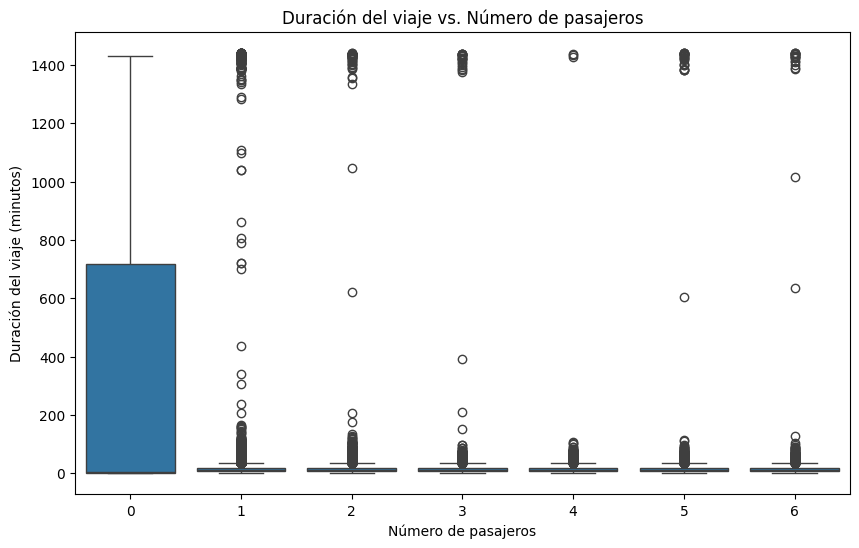

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

df['trip_duration_minutes'] = df['trip_duration'] / 60

plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='trip_duration_minutes', data=df)
plt.title('Duración del viaje vs. Número de pasajeros')
plt.xlabel('Número de pasajeros')
plt.ylabel('Duración del viaje (minutos)')
plt.show()

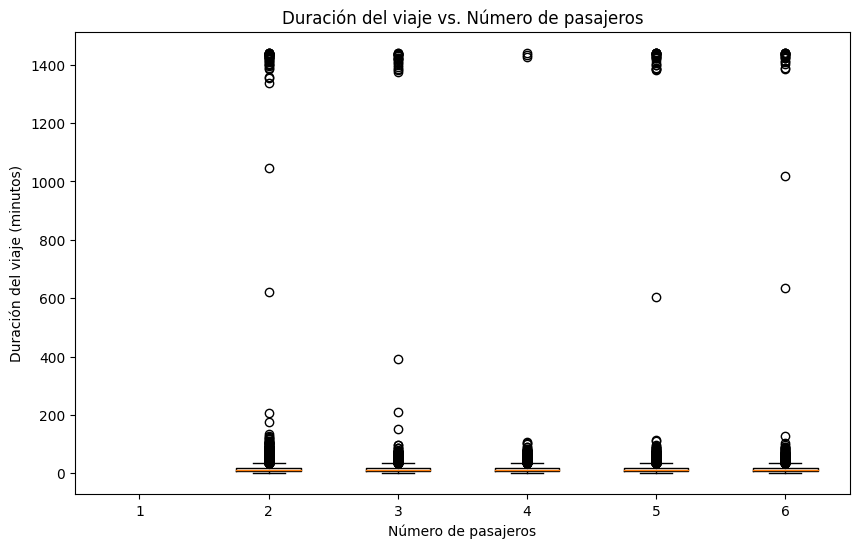

In [ ]:
durations = []

max_passengers = df['passenger_count'].max()

for i in range(1, max_passengers + 1):
    durations.append(df[df['passenger_count'] == i]['trip_duration_minutes'].tolist())

fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot(durations, labels=range(1, max_passengers + 1))

ax.set_title('Duración del viaje vs. Número de pasajeros')
ax.set_xlabel('Número de pasajeros')
ax.set_ylabel('Duración del viaje (minutos)')

plt.show()

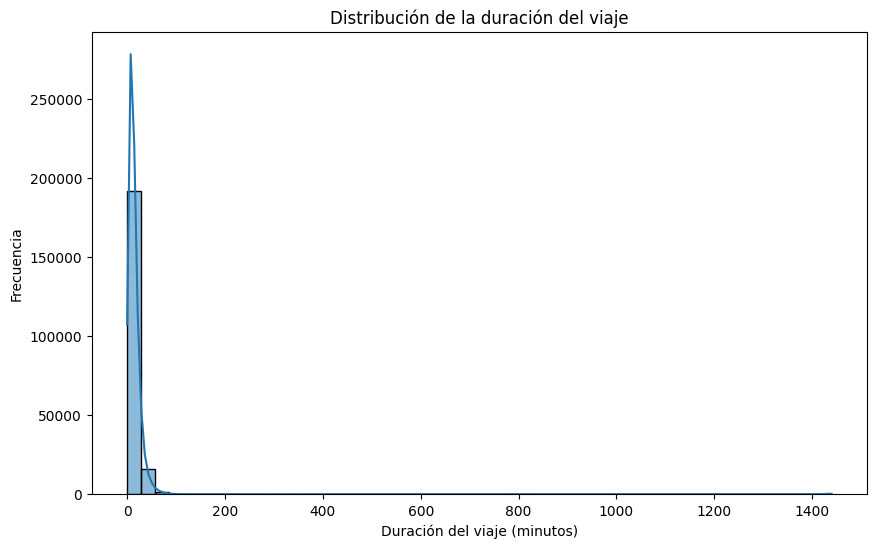

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration_minutes'], bins=50, kde=True)
plt.title('Distribución de la duración del viaje')
plt.xlabel('Duración del viaje (minutos)')
plt.ylabel('Frecuencia')
plt.show()

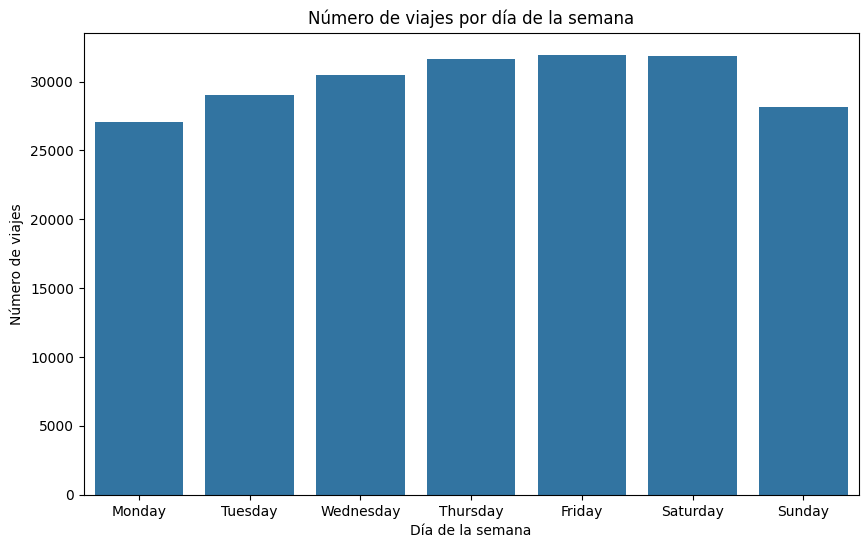

In [ ]:
df['pickup_day'] = df['pickup_datetime'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Número de viajes por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de viajes')
plt.show()